In [39]:
# Keras实践——线性回归
import keras
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#顺序模型
from keras.models import Sequential
#全连接层
from keras.layers import Dense
#使用numpy生成100个随机点
x_data = np.random.rand(100)
'''
loc：float
    此概率分布的均值（对应着整个分布的中心centre）
scale：float
    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
size：int or tuple of ints
    输出的shape，默认为None，只输出一个值
'''
noise = np.random.normal(loc=0,scale=0.01,size=x_data.shape)

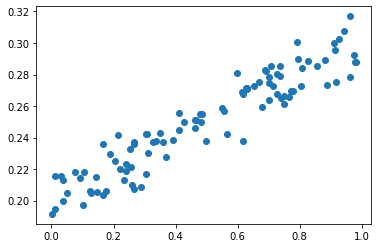

In [41]:
y_data = x_data * 0.1 +0.2 +noise

#显示随机点
plt.scatter(x_data,y_data)
plt.show()

In [42]:
#构建一个顺序模型
# Sequential模型可以构建非常复杂的神经网络，包括全连接神经网络、卷积神经网络(CNN)、循环神经网络(RNN)、等等。这里的Sequential更准确的应该理解为堆叠，通过堆叠许多层，构建出深度神经网络。
model = Sequential()
#在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1))
# 优化器选择的是 sgd 随机梯度下降 损失函数 是mse 均方误差
model.compile(optimizer='sgd',loss='mse')

for step in range(3001):
    #每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    #每500次打印一下cost值
    if step %500 ==0:
        print("COST",cost)
#打印权值和偏执值
w,b = model.layers[0].get_weights()
# w参数的作用，我们可以得到，是决定那个分割平面的方向所在.分割平面的投影就是直线w1x1+w2x2+b=0
# b是决定竖直平面沿着垂直于直线方向移动的距离，当b>0的时候，直线往左边移动，当b<0的时候，直线往右边移动.
print("权值",w,"偏执值",b)

COST 0.08387579023838043
COST 0.010842612013220787
COST 0.0029773826245218515
COST 0.0008743894286453724
COST 0.000312095187837258
COST 0.00016174982010852545
COST 0.00012155104195699096
权值 [[0.11315788]] 偏执值 [0.19404449]


In [47]:
x_data

array([1.28262906e-01, 6.31284227e-01, 2.56844229e-01, 6.91052225e-01,
       2.87961829e-01, 2.66828803e-01, 6.12865986e-01, 4.25814746e-01,
       6.89119781e-01, 3.12484212e-01, 7.06157455e-01, 9.62610683e-01,
       3.69982115e-02, 1.76477483e-01, 6.53832504e-04, 7.44109065e-02,
       6.18132481e-01, 3.36664368e-01, 9.14497528e-01, 2.66971560e-01,
       9.25457372e-01, 6.54170098e-01, 6.69519300e-01, 4.61855835e-01,
       2.39765671e-01, 5.07122299e-02, 7.92920244e-01, 7.26758283e-01,
       7.70807287e-01, 7.01800088e-01, 5.56124457e-01, 9.61232062e-01,
       9.43033348e-01, 4.10182663e-01, 1.25774670e-01, 8.05302874e-01,
       6.31293960e-01, 7.92588346e-01, 1.05541273e-01, 2.22385036e-01,
       2.33029880e-01, 1.67529059e-01, 7.49688906e-01, 9.25111298e-02,
       1.66231684e-01, 2.52268776e-01, 8.06540678e-01, 2.61108247e-01,
       6.77058695e-01, 9.16609557e-01, 9.77422833e-01, 3.76371061e-02,
       3.05250276e-01, 5.66688404e-01, 3.26289088e-01, 9.09149805e-01,
      

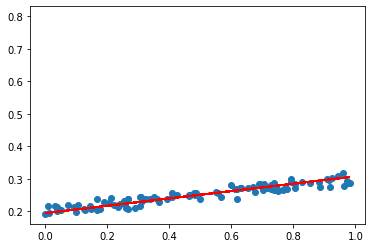

In [44]:
# x_data输入网络中，得到预测值
y_pred = model.predict(x_data)
#显示随机点
plt.scatter(x_data,y_data)
# 后面是y轴的范围
'''
format_string 由颜色字符、风格字符、标记字符组成
颜色字符
'b' 蓝色 'm' 洋红色 magenta
'g' 绿色 'y' 黄色
'r' 红色 'k' 黑色
'w' 白色 'c' 青绿色 cyan
'#008000' RGB某颜色 '0.8' 灰度值字符串
多条曲线不指定颜色时，会自动选择不同颜色
风格字符
'‐' 实线
'‐‐' 破折线
'‐.' 点划线
':' 虚线
'' ' ' 无线条
标记字符
'.' 点标记
',' 像素标记(极小点)
'o' 实心圈标记
'v' 倒三角标记
'^' 上三角标记
'>' 右三角标记
'<' 左三角标记...等等
'''
plt.plot(x_data,y_pred,'r-',0.8)
plt.show()

In [32]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(y_data,y_pred)
print('evs: %.2f%%'%(score*100.0))

evs: 89.31%


In [38]:
#随便测一个数据
a = np.array([0.2])
y3 = model.predict(a)
y3

array([[0.21887982]], dtype=float32)